# 数据挖掘流程

1.数据读取
- 读取数据
- 统计指标
- 查看数据规模

2.数据探索（特征理解）
- 单特征分析，逐个变量对结果y的影响（X与Y间的相关性）
- 多变量分析（X与X之间相关性）
- 统计绘图

3.数据清洗和预处理
- 缺失值填充
- 特征的标准化、归一化（聚类去量纲，其它还有加速的作用）
- 特征工程（筛选有价值的特征）
- 分析特征之间相关性（通过相关性检验，检验是否有共线性）

4.建立模型
- 特征数据和标签的准备
- 数据集的切分
- 多种模型对比：交叉验证、调参（学习曲线，网格搜索）
- 集成算法（提升算法）XGBoost、GBDT、light=GBM、神经网络（多种神经网络的集成）

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('fivethirtyeight')  # 加入画布风格
import warnings
warnings.filterwarnings('ignore')


In [3]:
data = pd.read_csv(r'E:\CDA数据分析就业班\10.机器学习\机器学习Day1-Day2\第二天\train.csv')

In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
# 统计标签
data.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

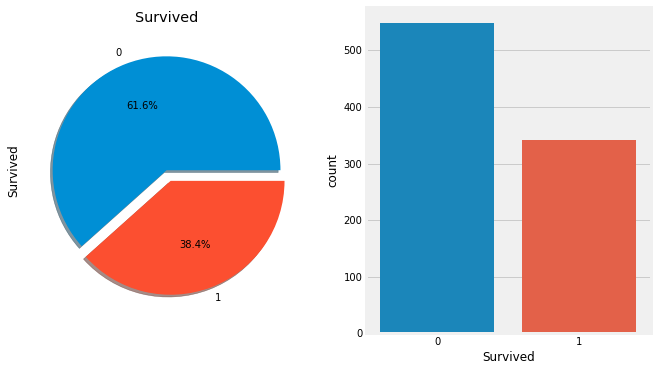

In [7]:
# 饼图和柱状图在分类型数据用的最多
# 标签的比例
f,ax = plt.subplots(1,2,figsize=(10,6))
data.Survived.value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Survived')

sns.countplot('Survived',data=data,ax=ax[1])

In [8]:
data.Survived.groupby(data['Sex']).value_counts()

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64

In [9]:
data.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

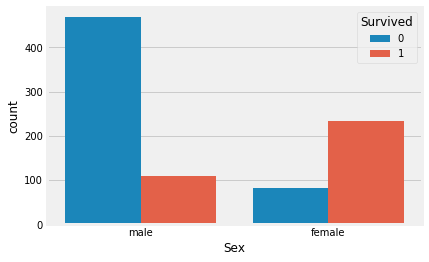

In [10]:
sns.countplot('Sex',hue='Survived',data=data)

In [11]:
# Pclass和获救的关系--利用交叉表
pd.crosstab(data.Pclass,data.Survived,margins=True).style.background_gradient(cmap='summer_r')
  #margins=True会对行列进行汇总求和

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


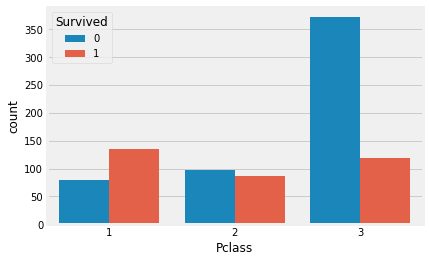

In [12]:
sns.countplot('Pclass',hue='Survived',data=data)

In [13]:
pd.crosstab([data.Sex,data.Survived],data.Pclass,margins=True).style.background_gradient(cmap='summer_r')

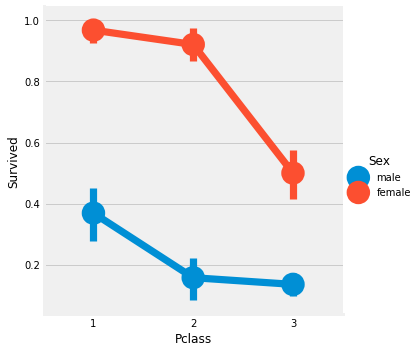

In [14]:
# 三维压缩成二维 因子图  三个维度要对比时这个办法很好用
sns.factorplot('Pclass','Survived',hue='Sex',data=data)

In [15]:
# 缺失值填充

In [16]:
data['initial'] = data.Name.str.extract('([A-Za-z]+)\.')
data['initial']

0          Mr
1         Mrs
2        Miss
3         Mrs
4          Mr
5          Mr
6          Mr
7      Master
8         Mrs
9         Mrs
10       Miss
11       Miss
12         Mr
13         Mr
14       Miss
15        Mrs
16     Master
17         Mr
18        Mrs
19        Mrs
20         Mr
21         Mr
22       Miss
23         Mr
24       Miss
25        Mrs
26         Mr
27         Mr
28       Miss
29         Mr
        ...  
861        Mr
862       Mrs
863      Miss
864        Mr
865       Mrs
866      Miss
867        Mr
868        Mr
869    Master
870        Mr
871       Mrs
872        Mr
873        Mr
874       Mrs
875      Miss
876        Mr
877        Mr
878        Mr
879       Mrs
880       Mrs
881        Mr
882      Miss
883        Mr
884        Mr
885       Mrs
886       Rev
887      Miss
888      Miss
889        Mr
890        Mr
Name: initial, Length: 891, dtype: object

In [17]:
pd.crosstab(data.initial,data.Sex).T #由于存在树形结果，所以进行转置

initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [18]:
re=[]
for i in data.initial.values:
    if i!='Master' and i!='Miss' and i!='Mr' and i!='Mrs':
        re.append(i.replace(i,'other'))
    else:
        re.append(i)

In [19]:
data['re'] = re
data.re.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'other'], dtype=object)

In [20]:
data.groupby('re')['Sex'].count()

re
Master     40
Miss      182
Mr        517
Mrs       125
other      27
Name: Sex, dtype: int64

In [21]:
for i in data.re.values:
    data.loc[(data.Age.isnull())&(data.re==i),'Age']=int(data.groupby('re')['Age'].mean()[i])


In [22]:
# 验证还有无缺失
data.Age.isnull().sum()

0

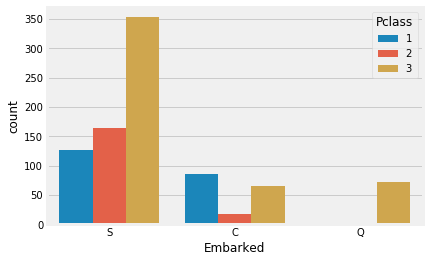

In [23]:
sns.countplot('Embarked',hue='Pclass',data=data)

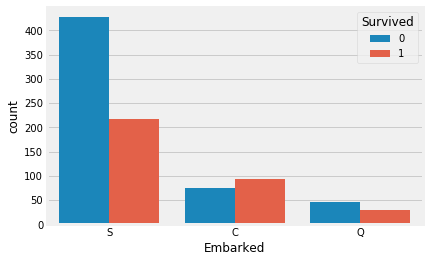

In [24]:
# 对比观察不同港口上船存活率
sns.countplot('Embarked',hue='Survived',data=data)

In [25]:
data['Embarked'].fillna('S',inplace=True)

In [26]:
# 验证是否还有缺失 用众数填充
data.Embarked.isnull().any()

False

In [27]:
# 通过交叉表 sibsp parch进行 自行

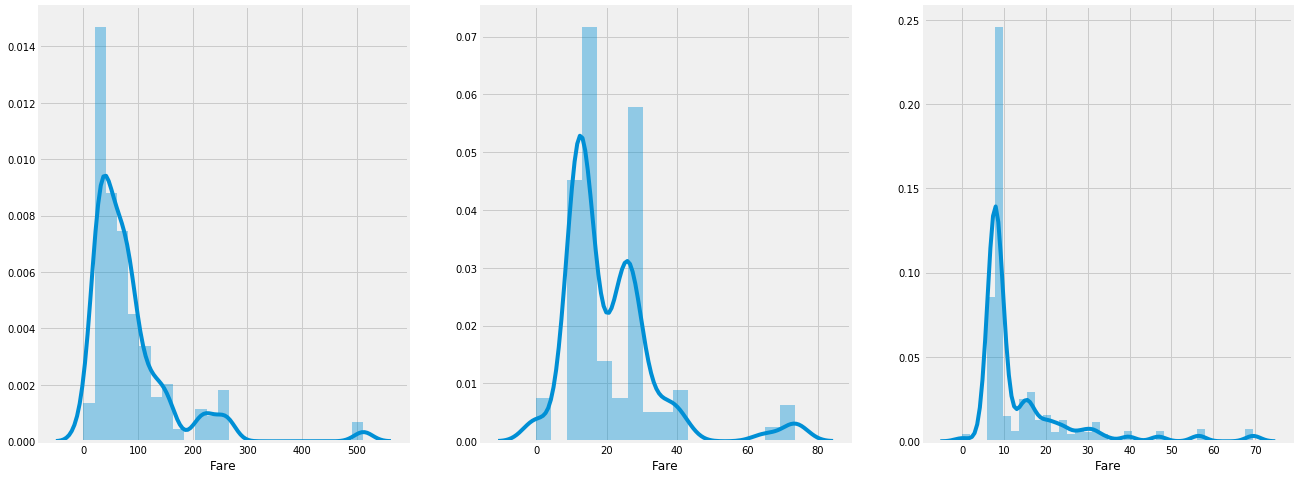

In [28]:
f,ax = plt.subplots(1,3,figsize=(20,8))
sns.distplot(data[data['Pclass']==1].Fare,ax=ax[0])
sns.distplot(data[data['Pclass']==2].Fare,ax=ax[1])
sns.distplot(data[data['Pclass']==3].Fare,ax=ax[2])


In [29]:
# 相关性检验--相关性热图
data.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.043358,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.089369,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.346011,0.083081,0.018443,-0.549500
Age,0.043358,-0.089369,-0.346011,1.000000,-0.268632,-0.195330,0.092215
SibSp,-0.057527,-0.035322,0.083081,-0.268632,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.195330,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.092215,0.159651,0.216225,1.000000


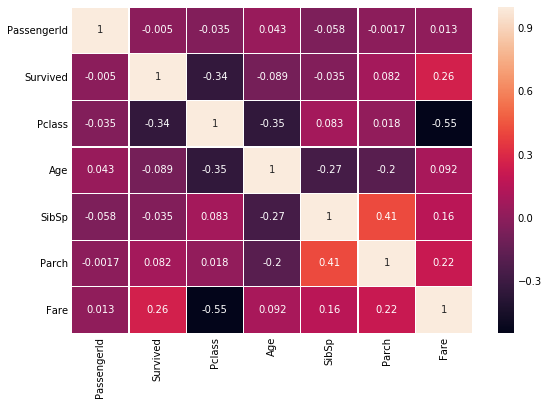

In [30]:
sns.heatmap(data.corr(),annot=True,linewidths=0.2)
fig = plt.gcf()
fig.set_size_inches(8,6)
plt.savefig('heatmap.jpg')

In [31]:
# 对age进行离散化
data['Age_band']=0
data.loc[data['Age']<=16,'Age_band']=0
data.loc[(data['Age']>16)&(data['Age']<=32),'Age_band']=1
data.loc[(data['Age']>32)&(data['Age']<=48),'Age_band']=2
data.loc[(data['Age']>48)&(data['Age']<=65),'Age_band']=3
data.loc[data['Age']>65,'Age_band']=4
data.head(2)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,initial,re,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,Mrs,2


In [32]:
# 将标签类别化
from sklearn import preprocessing

In [33]:
lbl = preprocessing.LabelEncoder()
data['Sex'] = lbl.fit_transform(data.Sex)
data.Embarked = lbl.fit_transform(data.Embarked)
data.re = lbl.fit_transform(data.re)

In [34]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,initial,re,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,2,Mr,2,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0,Mrs,3,2
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2,Miss,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2,Mrs,3,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,2,Mr,2,2


In [35]:
# 距离类模型，对数据大的有偏重，如embarked，但是实际上无大小关系，所以用哑变量

In [36]:
data.Embarked.unique()

array([2, 0, 1], dtype=int64)

In [37]:
# sparse=false会将编码加在一起，做读热编码必须用数值型数据
# 要求必须是二维数据所以是两层中括号
one_hot=preprocessing.OneHotEncoder(sparse=False)
data['Embarked']=one_hot.fit_transform(data[['Embarked']])


In [38]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,initial,re,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,0.0,Mr,2,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,1.0,Mrs,3,2
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0.0,Miss,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,0.0,Mrs,3,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,0.0,Mr,2,2


In [39]:
# 删除列
data.drop(['PassengerId','Name','Age','Ticket','Cabin','initial'],axis=1,inplace=True)

In [40]:
data.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,re,Age_band
0,0,3,1,1,0,7.2500,0.0,2,1
1,1,1,0,1,0,71.2833,1.0,3,2
2,1,3,0,0,0,7.9250,0.0,1,1
3,1,1,0,1,0,53.1000,0.0,3,2
4,0,3,1,0,0,8.0500,0.0,2,2


In [41]:
# 建模

In [42]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.linear_model import LogisticRegression,LinearRegression

In [43]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score

In [44]:
data.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,re,Age_band
0,0,3,1,1,0,7.2500,0.0,2,1
1,1,1,0,1,0,71.2833,1.0,3,2
2,1,3,0,0,0,7.9250,0.0,1,1
3,1,1,0,1,0,53.1000,0.0,3,2
4,0,3,1,0,0,8.0500,0.0,2,2


In [45]:
X = data.iloc[:,data.columns!='Survived']
y = data.iloc[:,data.columns=='Survived']

In [46]:
X.shape

(891, 8)

In [47]:
y.shape

(891, 1)

In [48]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,y,test_size=0.2,random_state=10)

In [49]:
# 逻辑回归
l = LogisticRegression()
l.fit(Xtrain,Ytrain)
l.score(Xtest,Ytest)

0.8100558659217877

In [50]:
pred_1 = l.predict(Xtest)
metrics.accuracy_score(Ytest,pred_1)

0.8100558659217877

In [51]:
pred_1

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0], dtype=int64)

In [52]:
# KNN


In [54]:
KNN = KNeighborsClassifier(n_neighbors=3)
KNN.fit(Xtrain,Ytrain)
KNN.score(Xtest,Ytest)

0.7597765363128491

In [55]:
# 决策树
from sklearn.model_selection import GridSearchCV

In [56]:
# 设置可选参数
param_grid = {'criterion':['entropy','gini'],
             'max_depth':range(2,10),
             'min_samples_leaf':range(1,10),
             'min_samples_split':range(2,10)}  # 不能小于等于1

# 设置网格
GR = GridSearchCV(DecisionTreeClassifier(),param_grid,cv=5)

# 建模
GR.fit(Xtrain,Ytrain)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(2, 10),
                         

In [57]:
# 输出接口
GR.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'min_samples_leaf': 5,
 'min_samples_split': 4}

In [58]:
GR.best_score_

0.8300561797752809

In [59]:
DTC = DecisionTreeClassifier(criterion='entropy',max_depth=9,min_samples_leaf=5,min_samples_split=4).fit(Xtest,Ytest)

In [60]:
DTC.score(Xtest,Ytest)

0.888268156424581

In [61]:
DTC.feature_importances_

array([0.13109227, 0.42463564, 0.        , 0.        , 0.29808515,
       0.        , 0.09055151, 0.05563543])

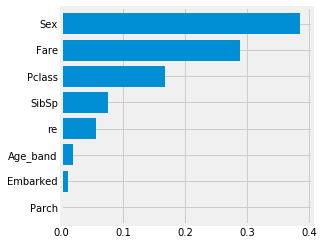

In [62]:
# 可视化展示
f = plt.figure(figsize=(4,4))
DTC = DecisionTreeClassifier(criterion='entropy',max_depth=8,
                            min_samples_leaf=5,min_samples_split=4).fit(Xtrain,Ytrain)

pd.Series(DTC.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8)


In [63]:
# 如果已经确定利用决策树，先进行特征重要性分析，如果特征比较多，可以筛选特征大于0.2的特征

In [64]:
# ROC曲线

In [65]:
y_pred = DTC.predict(Xtest)

In [66]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import roc_curve,auc # 计算roc和auc


In [67]:
# 计算真正率和假正率
fpr,tpr,th = roc_curve(Ytest,y_pred)
roc_auc = auc(fpr,tpr)

In [81]:
fpr

array([0.        , 0.12820513, 1.        ])

In [69]:
tpr

array([0.        , 0.77419355, 1.        ])

In [70]:
th

array([2, 1, 0], dtype=int64)

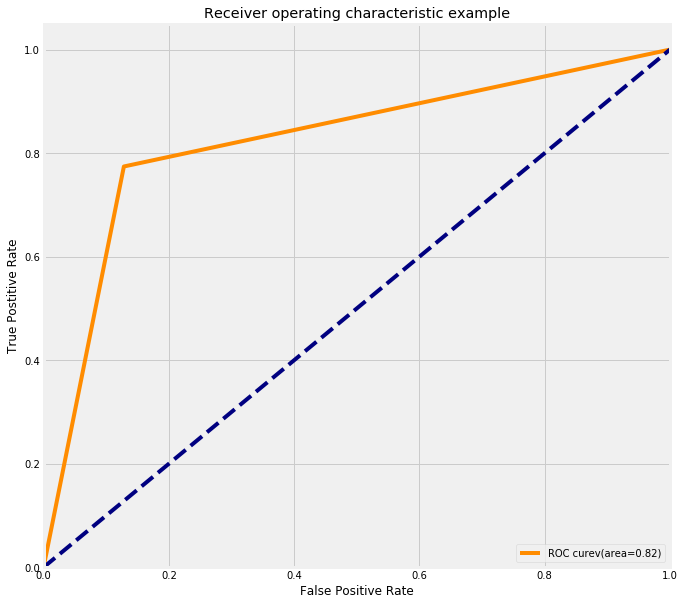

In [71]:
# 画图
plt.figure(figsize=(10,10))
plt.plot(fpr,tpr,color='darkorange',label='ROC curev(area=%0.2f)'%roc_auc) # 假正率横坐标，真正率纵坐标
plt.plot([0,1],[0,1],color='navy',linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Postitive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc='lower right')

In [72]:
# 画混淆矩阵

In [73]:
from sklearn.model_selection import cross_val_predict

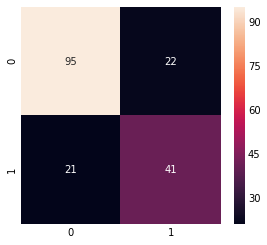

In [74]:
plt.figure(figsize=(4,4))
KNN = KNeighborsClassifier(n_neighbors=3)
KNN.fit(Xtrain,Ytrain)
y_pred =KNN.predict(Xtest)
sns.heatmap(confusion_matrix(Ytest,y_pred),annot=True,fmt='2.0f')

In [75]:
# 集成算法举例

In [76]:
from sklearn.ensemble import BaggingClassifier

In [77]:
model = BaggingClassifier(base_estimator=DTC,
                         n_estimators=700,
                         random_state=0)
model.fit(Xtrain,Ytrain)
model.score(Xtest,Ytest)

0.8659217877094972